In [ ]:
#Import Packages

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd 

In [ ]:
#Load dataset
df=pd.read_csv('stock_data.csv')

#Have a look at the data
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
#Check for missing values
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

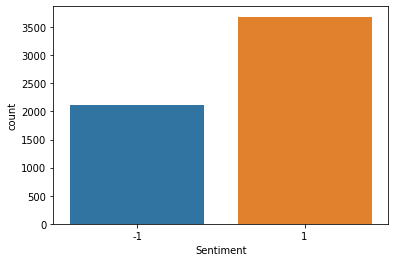

In [ ]:
#Count class labels. -1 is for negative sentiment whereas 1 is for positive sentiment
sns.countplot(x='Sentiment',data=df)

In [ ]:
#Download stopwords from nltk
nltk.download('stopwords')

#Empty list to store the corpus
corpus=[]

#Preprocess the text to create and store the clean corpus
for i in range(len(df)):
    words=df.iloc[i,0]
    words=re.sub('[^a-zA-Z]',' ',words)
    words=words.lower()
    words=words.split()
    words=[PorterStemmer().stem(word) for word in words if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(words))

In [ ]:
#Perform count vectorization to get the features matrix

vec=CountVectorizer(max_features=5000)
X=vec.fit_transform(corpus).toarray()

#Get the labels into target vector
y=df['Sentiment']

#Split the data into training and testing setas
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Create random forest classifier
rfc=RandomForestClassifier(n_estimators=250,max_depth=None)

#Train the classifier
rfc.fit(X_train,y_train)

#Perform prediction on test data
y_pred=rfc.predict(X_test)

In [ ]:
#Calculate and print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.67      0.69       619
           1       0.82      0.85      0.84      1119

    accuracy                           0.79      1738
   macro avg       0.77      0.76      0.76      1738
weighted avg       0.79      0.79      0.79      1738



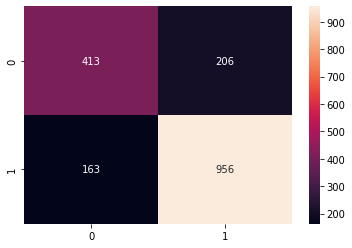

In [ ]:
#Confusion matrix of the classifier
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')